In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

file_path = "amazon_delivery.csv"

df = pd.read_csv(file_path)

selected_columns = [
    'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude',
    'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic',
    'Vehicle', 'Area', 'Delivery_Time'
]

df_selected = df[selected_columns]

print(df_selected.head())


   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date  \
0       22.745049        75.892471      22.765049       75.912471  2022-03-19   
1       12.913041        77.683237      13.043041       77.813237  2022-03-25   
2       12.914264        77.678400      12.924264       77.688400  2022-03-19   
3       11.003669        76.976494      11.053669       77.026494  2022-04-05   
4       12.972793        80.249982      13.012793       80.289982  2022-03-26   

  Order_Time Pickup_Time     Weather  Traffic      Vehicle            Area  \
0   11:30:00    11:45:00       Sunny    High   motorcycle           Urban    
1   19:45:00    19:50:00      Stormy     Jam      scooter   Metropolitian    
2   08:30:00    08:45:00  Sandstorms     Low   motorcycle           Urban    
3   18:00:00    18:10:00       Sunny  Medium   motorcycle   Metropolitian    
4   13:30:00    13:45:00      Cloudy    High      scooter   Metropolitian    

   Delivery_Time  
0            120  
1     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [8]:
df.shape

(43739, 16)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

file_path = "amazon_delivery.csv"
df = pd.read_csv(file_path)

selected_columns = [
    'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude',
    'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic',
    'Vehicle', 'Area', 'Delivery_Time'
]
df_selected = df[selected_columns]

df_selected = df_selected.dropna()

df_selected['Order_Date'] = pd.to_datetime(df_selected['Order_Date'])
df_selected['Day_of_Week'] = df_selected['Order_Date'].dt.dayofweek
df_selected['Order_Time'] = pd.to_datetime(df_selected['Order_Time'])
df_selected['Pickup_Time'] = pd.to_datetime(df_selected['Pickup_Time'])
df_selected['Time_To_Pickup'] = (df_selected['Pickup_Time'] - df_selected['Order_Time']).dt.total_seconds() / 60.0

df_selected = df_selected.drop(columns=['Order_Date', 'Order_Time', 'Pickup_Time'])

df_selected = pd.get_dummies(df_selected, columns=['Weather', 'Traffic', 'Vehicle', 'Area'])

X = df_selected.drop(columns=['Delivery_Time'])
y = df_selected['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/tmp/ipython-input-9-1856458624.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected['Order_Time'] = pd.to_datetime(df_selected['Order_Time'])
/tmp/ipython-input-9-1856458624.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected['Pickup_Time'] = pd.to_datetime(df_selected['Pickup_Time'])


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Revised DNN Model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth hidden layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 16068.0098 - val_loss: 6870.1626 - learning_rate: 0.0010
Epoch 2/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 3241.3306 - val_loss: 2383.4465 - learning_rate: 0.0010
Epoch 3/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2334.4221 - val_loss: 2452.9814 - learning_rate: 0.0010
Epoch 4/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 2346.6174 - val_loss: 2316.0913 - learning_rate: 0.0010
Epoch 5/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 2326.3027 - val_loss: 2472.9700 - learning_rate: 0.0010
Epoch 6/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 2314.4424 - val_loss: 2200.3142 - learning_rate: 0.0010
Epoch 7/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2278.7588 - val_loss: 2195.2148 - learning_rate: 0.0010
Epoch 8/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 2309.7249 - val_loss: 2303.0847 - learning_rate: 0.0010
Epoch 9/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step 

In [12]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")


273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Root Mean Squared Error (RMSE): 44.8871074696531


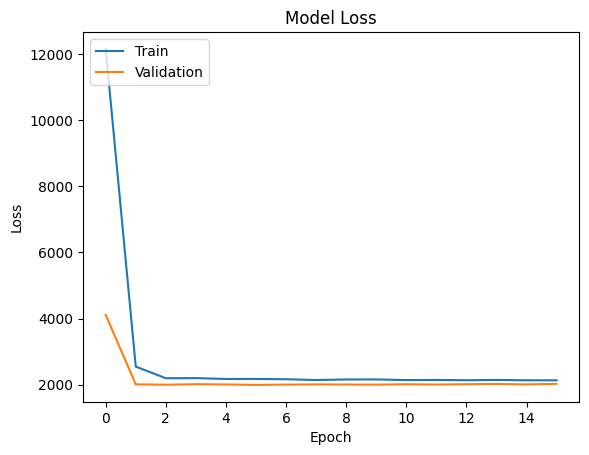

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 43.83686967129525
